In [59]:
from alfalfa import AlfalfaTree, AlfalfaForest
from alfalfa.tree_models.tree_kernels import AlfalfaGP
from alfalfa.tree_models.forest import DecisionNode
from alfalfa.fitting.bart.bart import BART
from alfalfa.fitting.bart.data import Data
from alfalfa.leaf_gp.space import Space, Dimension
from alfalfa.fitting.bart.params import BARTTrainParams
from alfalfa.utils.plots import plot_gp_1d, plot_covar_matrix

import math
import torch
import numpy as np
import gpytorch
from matplotlib import pyplot as plt
import scipy.stats as stats

In [60]:
# data
# Training data is 11 points in [0,1] inclusive regularly spaced
train_x = torch.linspace(0, 1, 10).reshape(-1, 1)
space = Space([[0.0, 1.0]])

# True function is sin(2*pi*x) with Gaussian noise
torch.manual_seed(42)
np.random.seed(42)
f = lambda x: torch.sin(x * (2 * math.pi))
train_y = (f(train_x) + torch.randn(train_x.size()) * 0.2).flatten()
data = Data(space, train_x)


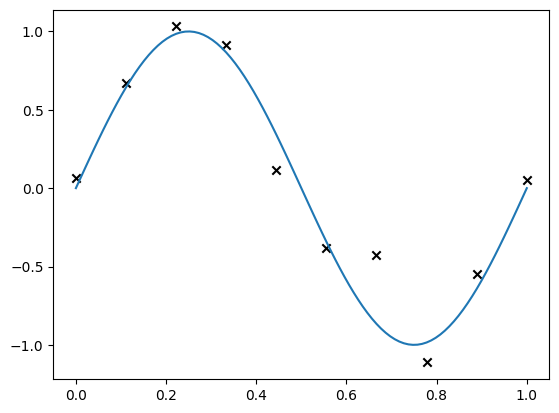

In [52]:
test_x = torch.linspace(0, 1, 100)
plt.scatter(train_x, train_y, color="black", marker="x")
plt.plot(test_x, f(test_x))

In [67]:
# model
# tree = AlfalfaTree(height=0)
# tree.initialise(space, data.get_init_prior())
forest = AlfalfaForest(trees=[
    AlfalfaTree(root=DecisionNode(0, t)) for t in np.linspace(0.2, 0.8, num=5)
])
forest.initialise(space)
likelihood = gpytorch.likelihoods.GaussianLikelihood(noise_constraint=gpytorch.constraints.Positive())
model = AlfalfaGP(train_x, train_y, likelihood, forest)

In [54]:
# bart setup
params = BARTTrainParams(warmup_steps=50, lag=5)
bart = BART(model, data, params, scale_prior=stats.halfnorm(scale=5.0))

In [58]:
for _ in range(100):
    root = bart.model.tree_model.root
    print(root)
    with torch.no_grad():
        bart.step()

N0(L), (L)
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (L)
N0(L), (L)
N0(L), (L)
L
L
N0(L), (L)
N0(L), (L)
N0(L), (N0(L), (L))
N0(L), (L)
L
L
L
L
L
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (L)
N0(L), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(N0(L), (L)), (L)), (L)
N0(N0(N0(L), (L)), (L)), (L)
N0(N0(N0(L), (L)), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (L)
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (L)
N0(L), (L)
N0(L), (L)
L
L
N0(L), (L)
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (N0(L), (L))
N0(L), (L)
N0(L), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L), (L)), (L)
N0(N0(L

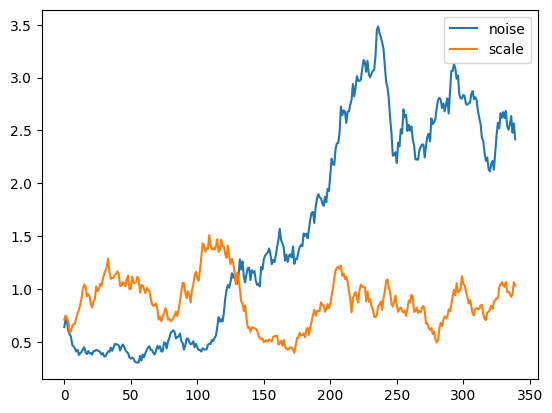

In [49]:
plt.plot(bart.logger["noise"], label="noise")
plt.plot(bart.logger["scale"], label="scale")
plt.legend()

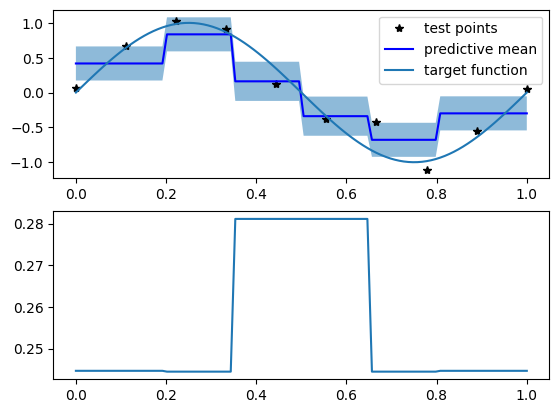

In [72]:
model.eval()
model.likelihood.noise = 0.01
model.covar_module.outputscale = 2.0
test_x = torch.linspace(0, 1, 100).reshape(-1, 1)
fig, ax = plot_gp_1d(model, test_x, f)
model
